In [1]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
from pylab import savefig

In [2]:
%matplotlib inline

In [3]:
# The OECD-GDP file was downloaded from http://stats.oecd.org/ from the Productivity, from the Level of GDP per Capita 
# and Productivity Series
df= pd.read_csv('stats/OECD-GDP.csv')
df.head()

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,T_GDP,Gross Domestic Product (GDP); millions,C,"National currency, current prices",1970,1970,NATCUR,National currency,6,Millions,NaN,NaN,40344.0,NaN,NaN
1,AUS,Australia,T_GDP,Gross Domestic Product (GDP); millions,C,"National currency, current prices",1971,1971,NATCUR,National currency,6,Millions,NaN,NaN,44515.0,NaN,NaN
2,AUS,Australia,T_GDP,Gross Domestic Product (GDP); millions,C,"National currency, current prices",1972,1972,NATCUR,National currency,6,Millions,NaN,NaN,49782.0,NaN,NaN
3,AUS,Australia,T_GDP,Gross Domestic Product (GDP); millions,C,"National currency, current prices",1973,1973,NATCUR,National currency,6,Millions,NaN,NaN,60323.0,NaN,NaN
4,AUS,Australia,T_GDP,Gross Domestic Product (GDP); millions,C,"National currency, current prices",1974,1974,NATCUR,National currency,6,Millions,NaN,NaN,71199.0,NaN,NaN


In [4]:
df[['SUBJECT','Subject']].drop_duplicates()

,SUBJECT,Subject
0,T_GDP,Gross Domestic Product (GDP); millions
47,T_GDPPOP,GDP per head of population
94,T_GDPHRS,GDP per hour worked
140,T_GDPEMP,GDP per person employed
744,T_HRSPOP,Labour utilisation (hours worked per head of p...
26277,T_HRSTO,Hours worked for total employment; millions
26370,T_GPGDHR,Gap in GDP per hour worked with respect to the...
26391,T_POPTOT,Total population; persons; thousands
26438,T_GPGDPO,Gap in GDP per capita with respect to the USA
26485,T_EMPTO,Total employment (number of persons employed);...


In [5]:
df[df['SUBJECT']=='T_GDPHRS'].count()

LOCATION                 6064
Country                  6064
SUBJECT                  6064
Subject                  6064
MEASURE                  6064
Measure                  6064
TIME                     6064
Time                     6064
Unit Code                6064
Unit                     6064
PowerCode Code           6064
PowerCode                6064
Reference Period Code    1512
Reference Period         1512
Value                    6064
Flag Codes                 60
Flags                      60
dtype: int64

In [6]:
# select on subject as GDP / Hours worked and Measure as 2010 prices
df1 = df[(df['SUBJECT']=='T_GDPHRS') & (df['MEASURE'] == 'VPVOB')][['Country','Time','Value']]
df1.head()

,Country,Time,Value
466,Australia,1970,26.693444
467,Australia,1971,27.362512
468,Australia,1972,27.965653
469,Australia,1973,28.537128
470,Australia,1974,28.083349


In [7]:
df1[df1.duplicated(keep=False)].head()

,Country,Time,Value


In [8]:
pvt = df1.pivot(index='Time', columns='Country', values='Value')
pvt.head()

Country,Australia,Austria,Belgium,Canada,Chile,Czech Republic,Denmark,Estonia,Euro area (19 countries),European Union (28 countries),...,Russia,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Time,,,,,,,,,,,,,,,,,,,,,
1970,26.693444,NaN,25.084171,27.017296,NaN,NaN,25.113912,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17.696573,24.908379,31.479338,9.877969,19.361896,31.062792
1971,27.362512,NaN,25.985270,27.721309,NaN,NaN,26.388707,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,18.421951,25.667385,32.338571,10.297393,20.619748,32.228337
1972,27.965653,NaN,27.794551,28.663977,NaN,NaN,27.790151,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19.903864,26.800402,33.303155,10.807287,21.832944,33.013565
1973,28.537128,NaN,29.676885,29.382344,NaN,NaN,29.305990,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,21.161357,28.030171,34.464967,11.002413,22.228798,33.796318
1974,28.083349,NaN,30.947245,29.497694,NaN,NaN,29.493858,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22.125983,28.696059,35.517558,11.417260,22.071598,33.499292


In [9]:
pvt.tail()

Country,Australia,Austria,Belgium,Canada,Chile,Czech Republic,Denmark,Estonia,Euro area (19 countries),European Union (28 countries),...,Russia,Slovak Republic,Slovenia,South Africa,Spain,Sweden,Switzerland,Turkey,United Kingdom,United States
Time,,,,,,,,,,,,,,,,,,,,,
2012,51.090550,52.155184,62.727118,46.953023,23.218438,32.589862,61.641645,28.872427,51.505216,46.134147,...,23.931606,35.656430,36.185634,19.780308,45.878685,53.416486,56.083469,33.087287,46.860667,62.202732
2013,52.058711,52.539996,62.970328,47.617455,22.965362,32.568698,62.126362,29.228019,52.090622,46.589158,...,24.286223,36.830325,35.802035,19.726000,46.519205,53.887083,57.007499,35.324324,46.916321,62.340647
2014,52.835155,52.704301,63.835945,48.669624,23.342146,33.012227,63.051317,29.927615,52.434018,46.848857,...,24.350961,37.506173,36.324828,19.681432,46.653466,54.500985,57.355522,35.351258,47.050193,62.487757
2015,53.375638,53.534614,64.386054,48.567483,23.540459,34.444034,63.355751,29.636329,52.882466,47.393777,...,23.491554,38.308442,36.620079,NaN,46.847275,55.831475,56.543026,36.442271,47.765055,62.887218
2016,NaN,53.852332,NaN,48.868520,NaN,34.380814,63.189924,29.957921,53.198091,47.669496,...,NaN,NaN,36.907157,NaN,47.262952,56.360040,NaN,NaN,47.522315,NaN


In [10]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:" + repr(fig_size))
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
#plt.rcParams["figure.figsize"] = fig_size

Current size:[6.0, 4.0]


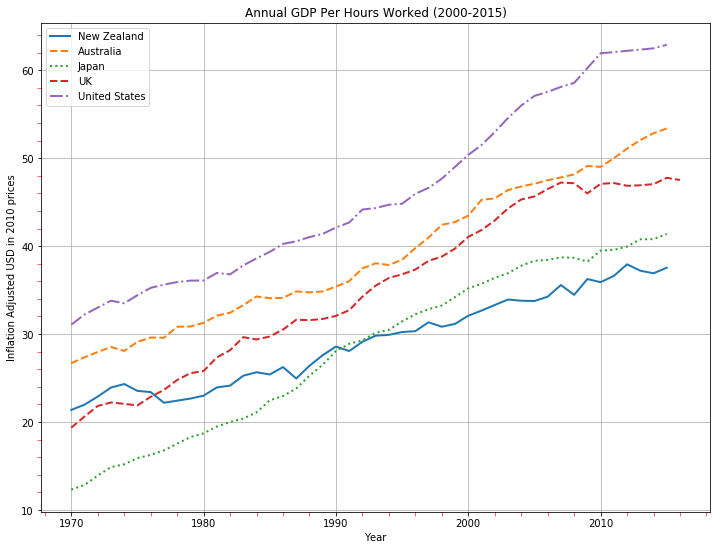

In [12]:
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

# One can supply an argument to AutoMinorLocator to
# specify a fixed number of minor intervals per major interval, e.g.:
# minorLocator = AutoMinorLocator(2)
# would lead to a single minor tick between major ticks.

# Each axis needs its own locator or only one axis will be marked with minor ticks
minorLocatorX = AutoMinorLocator(5)
minorLocatorY = AutoMinorLocator(5)

fig, ax = plt.subplots()
ax.plot(pvt.index, pvt['New Zealand'],'-', linewidth=2, label='New Zealand')
ax.plot(pvt.index, pvt['Australia'],'--', linewidth=2, label='Australia')
ax.plot(pvt.index, pvt['Japan'],':', linewidth=2, label='Japan')
ax.plot(pvt.index, pvt['United Kingdom'],'--', linewidth=2, label='UK')
ax.plot(pvt.index, pvt['United States'],'-.', linewidth=2, label='United States')

ax.legend(loc='upper left')
ax.set_xlabel('Year')
ax.set_ylabel('Inflation Adjusted USD in 2010 prices')
ax.yaxis.set_minor_locator(minorLocatorY)
ax.xaxis.set_minor_locator(minorLocatorX)
ax.grid(axis='both', which='major')
plt.tick_params(axis='both', which='minor', length=4, color='r')
#plt.xticks(range(1970,2017), rotation=45)
plt.title('Annual GDP Per Hours Worked (2000-2015)')
#savefig('GDP-per-hours-worked.png')
plt.show()